In [1]:

from SRC.utils import constants
from SRC.utils.logger import APP_Logger
from SRC.utils.common_utils import get_null_percent , sep_column_dtypes , reduce_memory_usage

Artifacts Directory: /home/pk/Desktop/Eda/Second Hand Car Price prediction/Artifacts
Raw Data Directory: /home/pk/Desktop/Eda/Second Hand Car Price prediction/Artifacts/RAW_DATA
Proccesed Data Directory: /home/pk/Desktop/Eda/Second Hand Car Price prediction/Artifacts/PROCCESED_DATA
Preprocessing Data Directory: /home/pk/Desktop/Eda/Second Hand Car Price prediction/Artifacts/PREPROCESSING_DIR
Imputer Directory: /home/pk/Desktop/Eda/Second Hand Car Price prediction/Artifacts/IMPUTER_DIR
Scaler Directory: /home/pk/Desktop/Eda/Second Hand Car Price prediction/Artifacts/SCALER_DIR
Model Directory: /home/pk/Desktop/Eda/Second Hand Car Price prediction/Artifacts/MODEL_DIR
Raw Data URL: https://raw.githubusercontent.com/pk1308/datasets/master/secondhand%20car/data_train.csv
Test Data URL: https://raw.githubusercontent.com/pk1308/datasets/master/secondhand%20car/data_test.csv
Raw Data File Name: /home/pk/Desktop/Eda/Second Hand Car Price prediction/Artifacts/RAW_DATA/RAW_DATA_TO_PROCESSCURRENT_

In [2]:
lg = APP_Logger("Ruuning_log")

In [3]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import shutil
import pickle
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import datetime
from warnings import filterwarnings
from pandas_profiling import ProfileReport
#***************************************************************************************************#
from sklearn.preprocessing import MinMaxScaler , LabelEncoder , StandardScaler , OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
#***************************************************************************************************#
from sklearn.metrics import mean_squared_error , mean_absolute_error , explained_variance_score , r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression ,ElasticNet , ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
import optuna
#***************************************************************************************************#

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
pd.options.display.max_columns = 200
%matplotlib inline
filterwarnings('ignore')

In [4]:
df = pd.read_csv(constants.RAW_DATA_URL) # reading raw data from url 
display(df.head())

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


In [5]:
df = reduce_memory_usage(df)

Memory usage decreased from 26.86MB to 1.39MB (25.46MB, 94.82% reduction)


In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   manufacturer_name      50000 non-null  category
 1   transmission           50000 non-null  category
 2   color                  50000 non-null  category
 3   odometer_value         50000 non-null  int32   
 4   year_produced          50000 non-null  int16   
 5   engine_fuel            50000 non-null  category
 6   engine_type            50000 non-null  category
 7   engine_capacity        49985 non-null  float32 
 8   body_type              50000 non-null  category
 9   has_warranty           50000 non-null  bool    
 10  ownership              50000 non-null  category
 11  type_of_drive          50000 non-null  category
 12  is_exchangeable        50000 non-null  bool    
 13  number_of_photos       50000 non-null  int8    
 14  number_of_maintenance  50000 non-null 

None

In [7]:
get_null_percent(df)

,null,percent
manufacturer_name,0,0.0000
transmission,0,0.0000
color,0,0.0000
odometer_value,0,0.0000
year_produced,0,0.0000
engine_fuel,0,0.0000
engine_type,0,0.0000
engine_capacity,15,0.0003
body_type,0,0.0000
has_warranty,0,0.0000


1. Engine capacity has 15 null values so we can drop the values as its 0.0003 percentage of total values - lets take a closer look

In [8]:
data = df.copy()

display(data[data.isnull().any(axis=1)]) # checking for null values in dataframe
display(data[data.isnull().any(axis=1)].shape) # conifirm the number 

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
4171,Fiat,automatic,orange,49000,2014,electric,electric,NaN,hatchback,False,owned,front,False,18,1,11,16000.0
6808,Nissan,automatic,white,57357,2015,electric,electric,NaN,hatchback,False,owned,front,False,20,57,75,13850.0
13927,Fiat,automatic,orange,49000,2014,electric,electric,NaN,hatchback,False,owned,front,False,18,1,11,16000.0
15761,Nissan,automatic,black,84000,2014,electric,electric,NaN,hatchback,False,owned,front,False,12,19,138,14500.0
17362,Fiat,automatic,orange,27000,2013,electric,electric,NaN,hatchback,False,owned,front,True,11,13,77,14900.0
21708,Fiat,automatic,orange,27000,2013,electric,electric,NaN,hatchback,False,owned,front,True,11,13,77,14900.0
27661,BMW,automatic,other,67000,2018,electric,electric,NaN,liftback,False,owned,rear,False,6,2,57,39999.0
29655,Nissan,automatic,white,50000,2014,electric,electric,NaN,hatchback,False,owned,front,False,12,7,18,12900.0
31396,BMW,automatic,white,54150,2015,electric,electric,NaN,hatchback,False,owned,rear,True,23,17,18,24750.0
35316,BMW,automatic,other,67000,2018,electric,electric,NaN,liftback,False,owned,rear,False,6,2,57,39999.0


(15, 17)

Interesting the engine_fuel and engine type is electric for all the cars with NAN

In [9]:
display(data[data['engine_type'] == "electric"].shape[0]) #total number of electric cars

15

All the columns with null values are: electric and we wont be able to drop the NAN value 

In [ ]:
display(data[data['engine_type'] == "electric"]['manufacturer_name'].value_counts()) # total number of electric cars by manufacturer

In [11]:
display(data[data['engine_type'] == "electric"]['body_type'].value_counts()) # total number of electric cars by body type

hatchback    12
liftback      3
cabriolet     0
coupe         0
limousine     0
minibus       0
minivan       0
pickup        0
sedan         0
suv           0
universal     0
van           0
Name: body_type, dtype: int64

In [12]:
display(data['body_type'].value_counts()) # total number of cars by body type

sedan        16910
hatchback     9923
universal     7151
suv           6677
minivan       4720
minibus       1760
van           1052
coupe          842
liftback       703
pickup         155
cabriolet       92
limousine       15
Name: body_type, dtype: int64

We will use KNN Imputer based on the number of neigebors as the total number of unquie values in each in body_type 

In [13]:
data["Nan_gudie_engine_capacity"] = df["engine_capacity"].isna() # creating a new column to check if engine_capacity is null or not

In [15]:
data["Nan_gudie_engine_capacity"].value_counts() # checking the number of null values in engine type

False    49985
True        15
Name: Nan_gudie_engine_capacity, dtype: int64

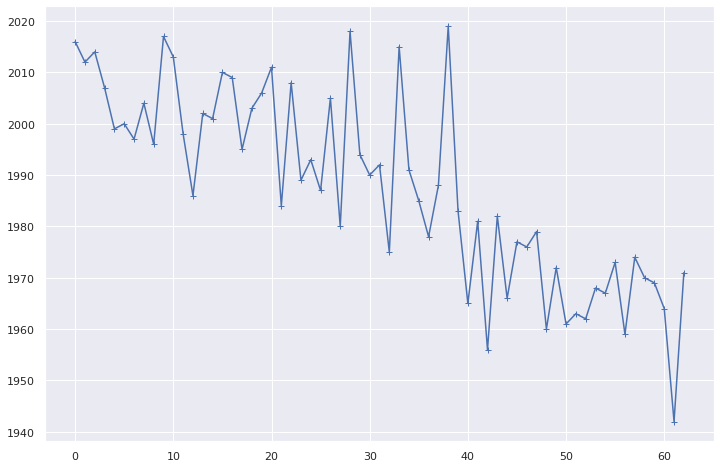

In [23]:
plt.figure(figsize=(12,8))
plt.plot(data['year_produced'].unique() , marker = '+') # checking the unique values in year_produced

In [ ]:
totalyears = data['year_produced'].unique()
currentyear = datetime.now().year
display(f'current:{currentyear}')
display(f'The oldest car is {currentyear- min(totalyears)}') # checking the difference between max and min year
display(f'The newest car is {currentyear - max(totalyears)}') # checking the difference between current year and min year

We  note that the age of the oldest car is 77 years old and the youngest car is 3 years old.

Most Goverenments dont allow cars ages more than 10 years to register - The car beyond 20 years are more like collectibles. so for this we analysis we will use 25 years as the max age. 

In [39]:
q1 = data['year_produced'].quantile(0.25)
q2 = data['year_produced'].quantile(0.5)
q3 = data['year_produced'].quantile(0.75)

iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

display(f'upper_bound:{upper_bound} and lower_bound:{lower_bound} , q1:{q1} , q2:{q2} , q3:{q3}')

'upper_bound:2025.5 and lower_bound:1981.5 , q1:1998.0 , q2:2003.0 , q3:2009.0'

In [31]:
CAR_MAX_AGE_YEAR = currentyear - 25 # setting the max age of car to 25 years

display(CAR_MAX_AGE_YEAR)

1997

In [35]:
display(data[data['year_produced'] >= CAR_MAX_AGE_YEAR].shape) # checking the number of cars with age greater than 25 years
display(data[data['year_produced'] < CAR_MAX_AGE_YEAR].shape) # checking the number of cars with age less than 25 years

(39926, 18)

(10074, 18)

In [36]:
data_new = data[data['year_produced'] >= CAR_MAX_AGE_YEAR] # creating a new dataframe with cars with age greater than 25 years
data_old = data[data['year_produced'] < CAR_MAX_AGE_YEAR] # creating a new dataframe with cars with age less than 25 years

<AxesSubplot:>

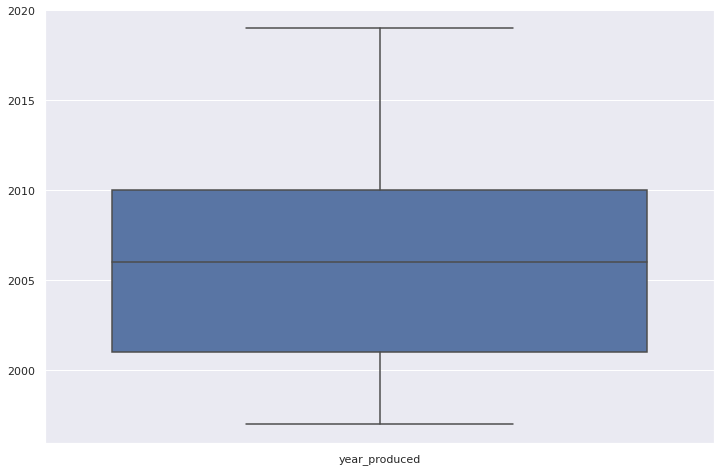

In [42]:
plt.figure(figsize=(12,8))
sns.boxplot(data = data_new [['year_produced']]) # checking the distribution of year_produced

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

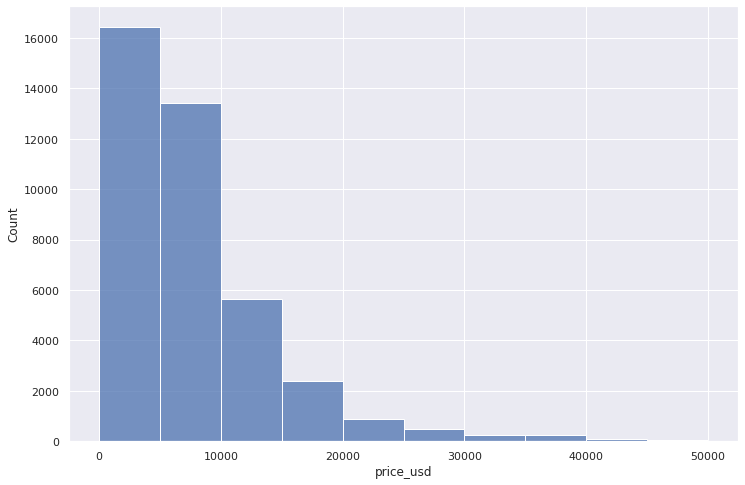

In [47]:
plt.figure(figsize=(12,8))
sns.histplot(data = data_new , x = 'price_usd' , bins = 10) # checking the distribution of year_produced

In [ ]:
neigbours = len(df['body_type'].unique())
imputer = KNNImputer(n_neighbors=neigbours , weights='distance')
df_imputed = imputer.fit_transform(df['engine_capacity'])

In [8]:
currentyear = datetime.now().year
CAR_MAX_AGE_YEAR = currentyear - 25 # setting the max age of car to 25 years

display(CAR_MAX_AGE_YEAR)

1997

In [11]:
df = df[df['year_produced'] >= CAR_MAX_AGE_YEAR] # creating a new dataframe with cars with age greater than 25 years

lg.info("Data with age greater than 25 years  has been dropped and we have {} rows".format(df.shape[0]))


Data with age greater than 25 years  has been dropped and we have 39926 rows


In [13]:
df.to_csv(constants.RAW_FILE_NAME , index = False) # saving the dataframe to csv file

PreProccseing 

In [50]:
df = pd.read_csv(constants.RAW_FILE_NAME) # reading the csv file

In [6]:
profile = ProfileReport(df, title='Pandas Profiling Report_pre_proccesing', html={'style':{'full_width':True}}) # creating a profile report
REPORT_FILE_NAME = os.path.join(constants.TEMPLATE_DIR, 'Pandas_Profiling_Report_pre_proccesing' + str(constants.CURRENT_TIME_STAMP)+'.html')

In [10]:
profile.to_file(REPORT_FILE_NAME) # saving the profile report to html file

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset has 12928 (32.4%) duplicate rows

In [11]:
df.duplicated().sum() # checking the number of duplicated rows

12965

In [13]:
DUMP_DIR = os.path.join(constants.ARIFACTS_DIR, 'DATA_DUMP')
os.makedirs(DUMP_DIR, exist_ok=True)

In [15]:
data = df.duplicated()

data.to_csv(os.path.join(DUMP_DIR , 'duplicate_data' + constants.CURRENT_TIME_STAMP + '.csv') ,  index = False) # saving the dataframe to csv file

lets frop the dupilcate and keep the first occurance 

In [19]:
df[df.duplicated()]["price_usd"].value_counts().sort_values() # checking the duplicated rows

15150.00      1
2836.75       1
10899.00      1
35999.00      1
8583.89       1
           ... 
3000.00     162
4000.00     168
4500.00     172
5500.00     187
3500.00     197
Name: price_usd, Length: 1449, dtype: int64

In [20]:
df[df["price_usd"] == 15150]

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
35247,Renault,manual,silver,128000,2016,diesel,diesel,1.5,suv,False,owned,front,False,23,27,44,15150.0
39916,Renault,manual,silver,128000,2016,diesel,diesel,1.5,suv,False,owned,front,False,23,27,44,15150.0


In [42]:
df[df.duplicated()]["price_usd"].value_counts().sample(40) # checking the duplicated rows

21400.000000      2
1050.000000      11
6908.379883       1
9722.089844       3
1210.650024       1
32500.000000      4
47000.000000      2
5406.430176       1
619.750000        1
15446.740234      1
5290.000000       1
6734.330078       1
6996.000000       1
10199.000000      1
16077.019531      2
13610.929688      1
8821.019531       1
20581.900391      1
14110.000000      1
8150.000000       7
3690.000000       1
4199.000000       2
12656.759766      1
1593.000000       1
10235.459961      1
12150.000000      2
8061.740234       1
948.500000        3
6950.000000      28
9199.000000       2
5699.000000       3
18750.000000      1
19700.000000      1
14999.000000     10
45500.000000      1
8500.000000     140
3300.000000      97
39500.000000      1
21500.000000     14
3899.000000       5
Name: price_usd, dtype: int64

In [44]:
df[df["price_usd"] == 1050.000000]

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
709,Lifan,manual,silver,222350,2011,gasoline,gasoline,1.6,sedan,False,owned,front,False,8,1,38,1050.0
2598,Citroen,manual,silver,220000,1997,diesel,diesel,1.9,hatchback,False,owned,front,True,11,3,68,1050.0
4662,Daewoo,manual,yellow,166000,2001,gasoline,gasoline,0.8,hatchback,False,owned,front,False,5,1,76,1050.0
5757,Kia,automatic,blue,485000,1998,gasoline,gasoline,2.0,sedan,False,owned,front,False,4,1,55,1050.0
6781,Citroen,manual,silver,400000,1999,diesel,diesel,1.9,universal,False,owned,front,False,7,2,84,1050.0
6846,Mitsubishi,manual,white,251000,1999,gasoline,gasoline,1.3,universal,False,owned,front,False,6,4,44,1050.0
9690,Lifan,manual,silver,222350,2011,gasoline,gasoline,1.6,sedan,False,owned,front,False,8,1,38,1050.0
11199,Citroen,manual,silver,220000,1997,diesel,diesel,1.9,hatchback,False,owned,front,True,11,3,68,1050.0
11507,Renault,manual,green,302000,1997,gasoline,gasoline,1.6,sedan,False,owned,front,False,5,19,46,1050.0
11642,Daewoo,manual,yellow,166000,2001,gasoline,gasoline,0.8,hatchback,False,owned,front,False,5,1,76,1050.0


In [45]:
df = reduce_memory_usage(df)

Memory usage decreased from 1.11MB to 1.11MB (0.00MB, 0.00% reduction)


In [47]:
catgeories_columns, boolan_columns, numeric_columns = sep_column_dtypes(df)

# we will use the master colum to drop the vaLUEs BY DROPING THE PRICE COLUMN


In [51]:
FEATURE_COLUMNS = df.drop(columns = ['price_usd'] , axis = 1).columns.tolist()

In [53]:
df.shape , len(FEATURE_COLUMNS)

((39926, 17), 16)

In [79]:
data = df[df.duplicated( keep='first')]
display(data.shape)

(12965, 17)

In [60]:
master_duplicate_index = data.index

In [61]:
len(master_duplicate_index)

12965

In [65]:
data1 = df[df.duplicated(FEATURE_COLUMNS)]
display(data1.shape)

(13070, 17)

In [66]:
Feature_duplicate_index = data1.index
len(Feature_duplicate_index)

13070

In [67]:
difference_index = [index for index in Feature_duplicate_index if index not in master_duplicate_index]

In [69]:
difference_index_master = [index for index in master_duplicate_index if index not in Feature_duplicate_index]

In [70]:
len(difference_index) , len(difference_index_master)

(105, 0)

In [75]:
df.iloc[difference_index]['odometer_value'].value_counts()

0         104
250000      1
Name: odometer_value, dtype: int64

In [78]:
df.iloc[difference_index].groupby(['manufacturer_name','odometer_value']).count()

,,transmission,color,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
manufacturer_name,odometer_value,,,,,,,,,,,,,,,
Renault,250000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Skoda,0,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104


In [80]:
df = df.drop_duplicates( keep = 'first') # dropping the duplicated rows

In [82]:
catgeories_columns

['manufacturer_name',
 'transmission',
 'color',
 'engine_fuel',
 'engine_type',
 'body_type',
 'ownership',
 'type_of_drive']

Odometer has a lot of o Values lets check thoose 
Zeros	563 
Zeros (%)	1.4%

In [86]:
df[df['odometer_value'] == 0]['year_produced'].value_counts()

2019    344
2018      6
2017      3
2016      1
Name: year_produced, dtype: int64

In [87]:
df[(df['odometer_value'] == 0)& (df['year_produced'] < 2019)]

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
3036,Ford,automatic,blue,0,2018,gasoline,gasoline,1.5,suv,True,new,all,True,13,6,27,23000.00
5553,Hyundai,automatic,black,0,2018,gasoline,gasoline,1.6,suv,False,new,all,False,1,1,16,30304.47
5832,Jeep,manual,grey,0,2016,diesel,diesel,2.8,suv,False,new,all,False,4,94,252,43000.00
13680,Toyota,automatic,white,0,2017,gasoline,gasoline,1.8,sedan,False,new,front,True,20,3,40,15000.00
15112,Mini,automatic,grey,0,2018,gasoline,gasoline,1.5,suv,False,new,all,False,28,53,66,39456.08
16485,Jeep,automatic,orange,0,2017,gasoline,gasoline,1.4,suv,False,new,all,True,12,354,839,37224.00
17675,Volkswagen,manual,black,0,2018,gasoline,gasoline,1.4,suv,True,new,front,True,10,1,1,19991.00
31657,Renault,manual,silver,0,2018,gasoline,gasoline,1.6,suv,False,new,front,False,9,1,7,9500.00
34057,Jeep,automatic,orange,0,2017,gasoline,gasoline,1.4,suv,False,new,all,False,9,330,773,34900.00
36170,Skoda,automatic,grey,0,2018,gasoline,gasoline,2.0,suv,False,new,all,False,3,111,427,34000.00


The number of maintenance don't corelate to new vehicle - 0 odometer value

In [89]:
df[df['odometer_value'] == 0].to_csv(os.path.join(DUMP_DIR , 'odometer_value_zero' + constants.CURRENT_TIME_STAMP + '.csv')) # saving the dataframe to csv file

<AxesSubplot:xlabel='number_of_photos', ylabel='price_usd'>

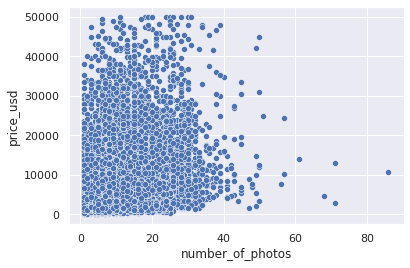

In [95]:
sns.scatterplot(data = df , x = 'number_of_photos' , y = 'price_usd')

NO realation ration is seen between the number of photos and price

In [96]:
PHOTOTHERSHOLD = df['number_of_photos'].quantile(0.70)
df['number_of_photos'] = df['number_of_photos'].apply(lambda x: x if x < PHOTOTHERSHOLD else PHOTOTHERSHOLD)

<AxesSubplot:xlabel='duration_listed', ylabel='price_usd'>

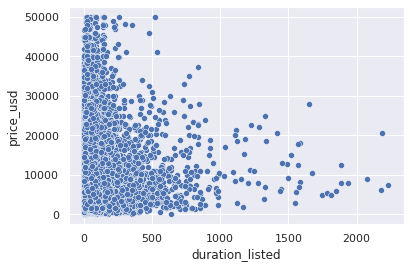

In [97]:
# duration_listed
sns.scatterplot(data = df , x = 'duration_listed' , y = 'price_usd')

In [101]:
MAIN_DURATION_THRESHOLD = df['duration_listed'].quantile(0.30)
display (MAIN_DURATION_THRESHOLD)
df['duration_listed'] = df['duration_listed'].apply(lambda x: x if x < MAIN_DURATION_THRESHOLD else MAIN_DURATION_THRESHOLD)

31.0

Lets do the analysis on the price

<AxesSubplot:>

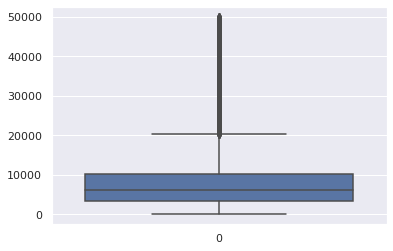

In [106]:
sns.boxplot(data= df['price_usd'])

In [111]:
FEATURE_COLUMNS

['manufacturer_name',
 'transmission',
 'color',
 'odometer_value',
 'year_produced',
 'engine_fuel',
 'engine_type',
 'engine_capacity',
 'body_type',
 'has_warranty',
 'ownership',
 'type_of_drive',
 'is_exchangeable',
 'number_of_photos',
 'number_of_maintenance',
 'duration_listed']

In [107]:
q1 = df['price_usd'].quantile(0.25)
q3 = df['price_usd'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr


In [115]:
df[df['price_usd']> upper_bound].groupby(['manufacturer_name' , 'engine_capacity' , 'body_type'])['price_usd'].mean()

manufacturer_name  engine_capacity  body_type
Acura              3.5              suv          29762.50
                   3.7              suv          22750.00
Alfa Romeo         2.4              coupe        22000.00
Audi               1.4              hatchback    23000.00
                                    sedan        22724.50
                                                   ...   
Volvo              2.4              universal    23465.00
                   2.5              suv          26250.00
                   3.2              suv          24249.50
ГАЗ                2.7              van          21341.17
                   2.8              van          22289.67
Name: price_usd, Length: 300, dtype: float64

In [116]:
df[df['price_usd']> upper_bound]['engine_capacity'].unique()

array([2. , 3. , 3.7, 2.2, 4.6, 1.8, 3.5, 2.4, 2.5, 1.4, 1.6, 5.5, 6.2,
       4.5, 2.8, 3.6, 4.4, 2.3, 2.7, 1.3, 4. , 5.6, 4.2, 5. , 6. , 4.8,
       1.5, 5.7, 2.1, 4.7, 5.3, 3.2, 2.9, 5.2, 3.8, nan, 4.1, 6.4])

In [119]:
df[(df['price_usd']> upper_bound) & (df['engine_capacity'] < 1.6)].head(50)

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
551,Skoda,manual,blue,0,2019,gasoline,gasoline,1.4,sedan,True,new,front,True,12.0,2,3.0,27071.99
614,Skoda,automatic,blue,0,2019,gasoline,gasoline,1.4,sedan,True,new,front,True,12.0,1,2.0,23890.26
871,Cadillac,automatic,black,57399,2014,hybrid-petrol,gasoline,1.4,coupe,False,owned,front,True,12.0,12,27.0,24999.00
1282,Skoda,automatic,black,0,2019,gasoline,gasoline,1.4,sedan,True,new,front,True,12.0,1,2.0,23892.16
1388,Cadillac,automatic,silver,64000,2013,hybrid-petrol,gasoline,1.4,coupe,False,owned,front,True,3.0,3,31.0,22289.67
1960,Skoda,manual,black,0,2019,gasoline,gasoline,1.4,sedan,True,new,front,True,12.0,11,25.0,25848.90
2279,Skoda,automatic,brown,0,2019,gasoline,gasoline,1.4,suv,True,new,front,True,12.0,10,26.0,26981.41
2314,Skoda,automatic,green,0,2019,gasoline,gasoline,1.4,sedan,True,new,front,True,12.0,1,2.0,23826.71
2388,Mercedes-Benz,automatic,silver,0,2019,gasoline,gasoline,1.3,sedan,False,new,front,False,12.0,2,3.0,34228.29
3036,Ford,automatic,blue,0,2018,gasoline,gasoline,1.5,suv,True,new,all,True,12.0,6,27.0,23000.00


In [120]:
df[(df['price_usd']> upper_bound) & (df['engine_capacity'] >3.6)].head(50)

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
174,Infiniti,automatic,brown,131000,2011,gasoline,gasoline,3.7,suv,False,owned,all,False,12.0,3,31.0,20700.00
309,Lexus,automatic,black,106000,2010,gasoline,gasoline,4.6,suv,False,owned,all,True,12.0,77,31.0,26499.00
943,Mercedes-Benz,automatic,black,305000,2005,gasoline,gasoline,5.5,suv,False,owned,all,False,12.0,3,31.0,27500.00
1197,Mercedes-Benz,automatic,blue,76700,2008,gasoline,gasoline,6.2,sedan,False,owned,all,True,12.0,2,1.0,28500.00
1200,Toyota,automatic,black,143000,2011,diesel,diesel,4.5,suv,False,owned,all,False,9.0,13,31.0,36500.00
1483,Mercedes-Benz,automatic,grey,64338,2016,gasoline,gasoline,5.5,sedan,False,owned,all,False,12.0,27,31.0,49900.00
1753,BMW,automatic,black,46300,2013,gasoline,gasoline,4.4,coupe,False,owned,all,False,12.0,13,31.0,34600.00
2680,BMW,automatic,black,160000,2011,diesel,diesel,4.0,suv,False,owned,all,False,3.0,4,31.0,30990.00
2750,Infiniti,automatic,other,150000,2013,gasoline,gasoline,5.6,suv,False,owned,all,False,12.0,2,2.0,22900.00
2833,Toyota,manual,blue,284000,2009,diesel,diesel,4.2,suv,False,owned,all,False,8.0,3,31.0,36000.00


Alll seems to be high end cars or pick up we will kepp it for now 

In [5]:
df.to_csv(constants.PROCCESED_FILE_NAME , index = False) # saving the dataframe to csv file

In [6]:

df_proceeded = pd.read_csv(constants.PROCCESED_FILE_NAME) # reading the csv file

In [7]:
df_proceeded.shape

(27000, 17)

In [8]:
df_proceeded = reduce_memory_usage(df_proceeded)

Memory usage decreased from 14.50MB to 0.76MB (13.75MB, 94.79% reduction)


In [9]:
catgeories_columns , boolan_columns , numeric_columns = sep_column_dtypes(df_proceeded)

In [10]:
X = df_proceeded.drop(columns = ['price_usd'] , axis = 1)
y = df_proceeded['price_usd']

In [11]:
X_encoded = pd.get_dummies(X)


In [12]:
NEIGHBORS = len(df['body_type'].unique())
imputer = KNNImputer(n_neighbors=NEIGHBORS)
X_imputed = imputer.fit_transform(X_encoded)

In [15]:
pickle.dump(imputer, open(os.path.join(constants.IMPUTER_FIle_NAME), 'wb'))

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pickle.dump(scaler, open(os.path.join(constants.SCALER_FILE_NAME), 'wb'))

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size = 0.2 , random_state = 42)

In [18]:
def model_result(modelname , model , X_test , y_test , counter ):
    """ Print the result of the model """

    y_pred = model.predict(X_test)
    result_dict = {}
    result_dict['Name'] = modelname
    result_dict['R2 score'] = model.score(X_test, y_test)
    result_dict['eV_score'] = explained_variance_score(y_test, y_pred)
    result_dict['RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
    result_dict['MAE'] = mean_absolute_error(y_test, y_pred)
    result_dict['MSE'] = mean_squared_error(y_test, y_pred)
    df= pd.DataFrame(result_dict , columns= result_dict.keys() , index = [counter])
    # display(df)
    return df

In [19]:
model_lr= LinearRegression()
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(X_train, y_train)
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
model_svr= SVR(kernel='rbf', C=1e3, gamma=0.1)
model_rf = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0)
model_xgb= xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
            max_depth = 30, alpha =1.18547,n_estimators = 200 )
master_result = pd.DataFrame()

model_lr.fit(X_train, y_train)
result = model_result('Linear Regression' , model_lr , X_test , y_test , 0)
master_result = master_result.append(result)


elasticnet_reg.fit(X_train, y_train)
result = model_result('Elastic Net' , elasticnet_reg.fit(X_train, y_train) , X_test , y_test , 1)
master_result = master_result.append(result)

model_svr.fit(X_train, y_train)
result = model_result('SVR' , model_svr , X_test , y_test , 2)
master_result = master_result.append(result)

model_rf.fit(X_train, y_train)
result = model_result('Random Forest' , model_rf , X_test , y_test , 3)
master_result = master_result.append(result)

model_xgb.fit(X_train, y_train)
result = model_result('XGBoost' , model_xgb , X_test , y_test , 4)
master_result = master_result.append(result)

pickle.dump(model_lr , open(os.path.join(constants.MODEL_DIR , 'LinearRegression.pkl'), 'wb'))
pickle.dump(elasticnet_reg, open(os.path.join(constants.MODEL_DIR , 'ElasticNet.pkl'), 'wb'))
pickle.dump(model_svr, open(os.path.join(constants.MODEL_DIR , 'SVR.pkl'), 'wb'))
pickle.dump(model_rf, open(os.path.join(constants.MODEL_DIR , 'RandomForest.pkl'), 'wb'))
pickle.dump(model_xgb, open(os.path.join(constants.MODEL_DIR , 'XGBoost.sav'), 'wb'))





In [21]:
master_result

,Name,R2 score,eV_score,RMSE,MAE,MSE
0,Linear Regression,0.740955,0.740983,3332.138201,2048.386490,1.110314e+07
1,Elastic Net,0.447162,0.447175,4867.821619,3200.512492,2.369569e+07
2,SVR,0.437658,0.466875,4909.483349,2457.537138,2.410303e+07
3,Random Forest,0.615797,0.615798,4058.034157,2461.409326,1.646764e+07
4,XGBoost,0.921525,0.921533,1834.009399,891.760925,3.363590e+06


In [4]:
df = pd.read_csv(constants.TEST_DATA_URL)

In [23]:
X = df_proceeded.drop(columns = ['price_usd'] , axis = 1)
y = df_proceeded['price_usd']
X_encoded = pd.get_dummies(X)
imputer = pickle.load(open(os.path.join(constants.IMPUTER_FIle_NAME), 'rb'))
X_imputed = imputer.transform(X_encoded)
scaler = pickle.load(open(os.path.join(constants.SCALER_FILE_NAME), 'rb'))
X_scaled = scaler.fit_transform(X_imputed)

model_xgb = pickle.load(open(os.path.join(constants.MODEL_DIR , 'XGBoost.sav'), 'rb'))

model_result("XGBOost" , model_xgb , X_scaled , y , 1)


,Name,R2 score,eV_score,RMSE,MAE,MSE
1,XGBOost,0.983174,0.983175,824.684387,181.959518,680104.375
